Generating confinement loss prediction models...


C:\Users\grajg_dxmvb96\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\grajg_dxmvb96\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\grajg_dxmvb96\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\grajg_dxmvb96\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

Generating operating wavelength (opw) prediction models...

Table: Performance analysis of MLR for confinement loss prediction
   Fold       MAE         MSE      RMSE  R squared value
      1  9.781223  113.207237 10.639889         0.188033
      2 18.352274  544.084559 23.325620         0.432116
      3 13.327536  295.242425 17.182620        -0.038302
      4 22.313565  539.506853 23.227287        -0.462810
      5 17.848617  378.750036 19.461501         0.244456
      6 21.225213  530.971499 23.042819        -0.675467
      7 10.692695  173.336990 13.165751        -2.936799
      8 22.945322 1017.741900 31.902067         0.020304
      9 10.068532  150.502673 12.267953         0.382413
     10 14.684599  502.956196 22.426685         0.325704
Average 16.123958  424.630037 19.664219        -0.252035

Table: Performance analysis of SVR for confinement loss prediction
   Fold       MAE         MSE      RMSE  R squared value
      1  9.993438  131.172822 11.453070         0.059177
      2

C:\Users\grajg_dxmvb96\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model analysis complete! Results saved to CSV files and plots generated.


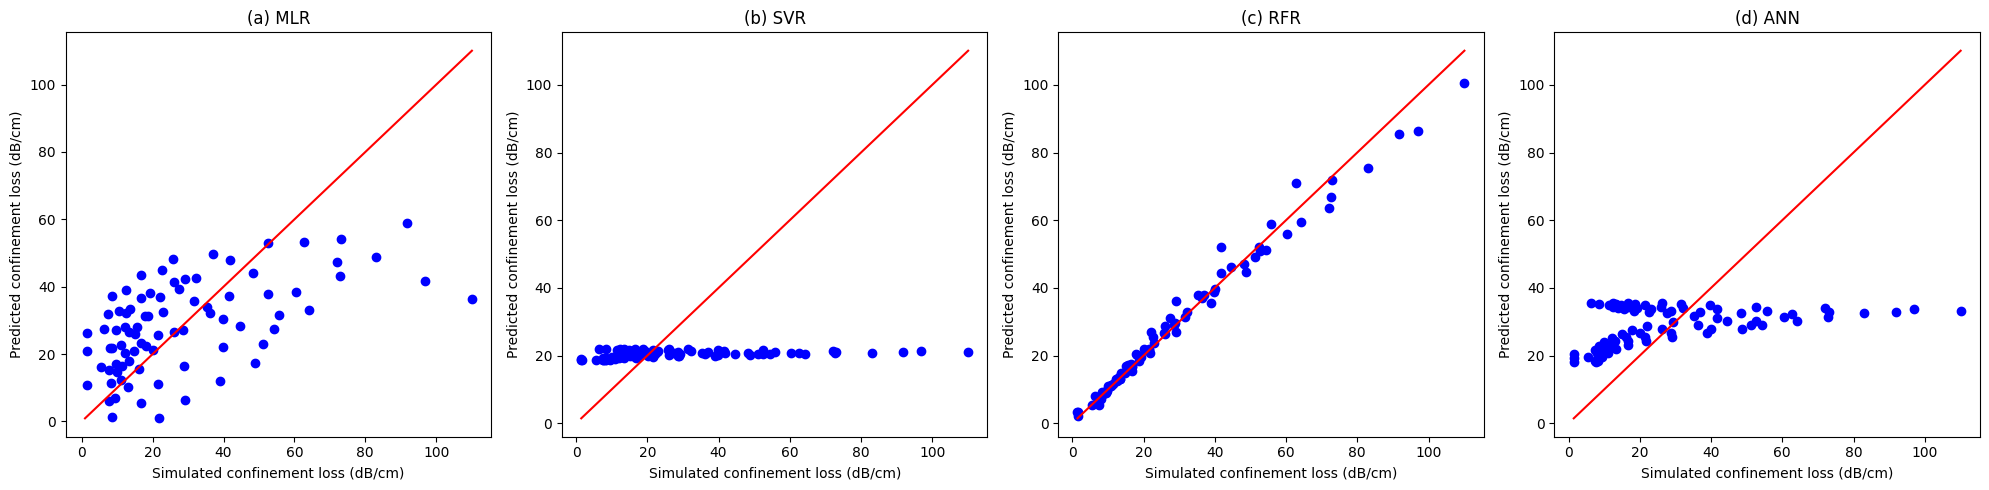

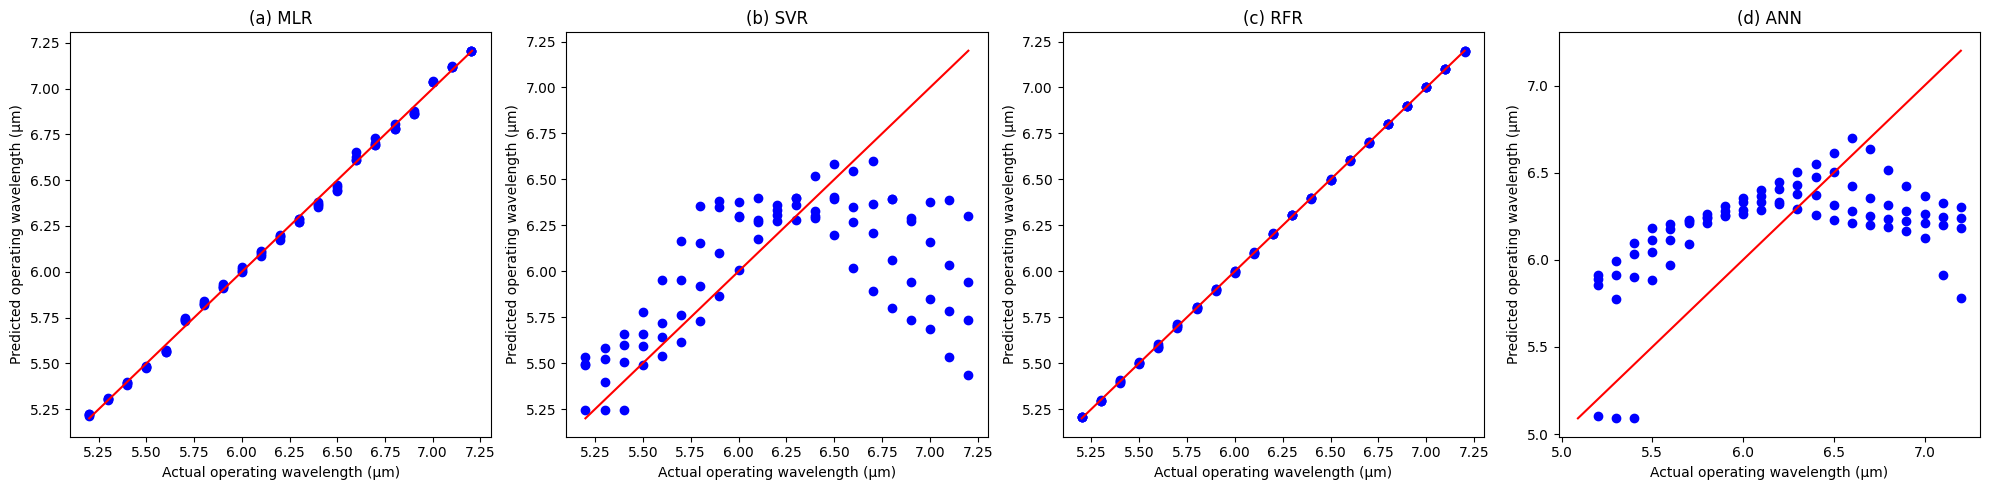

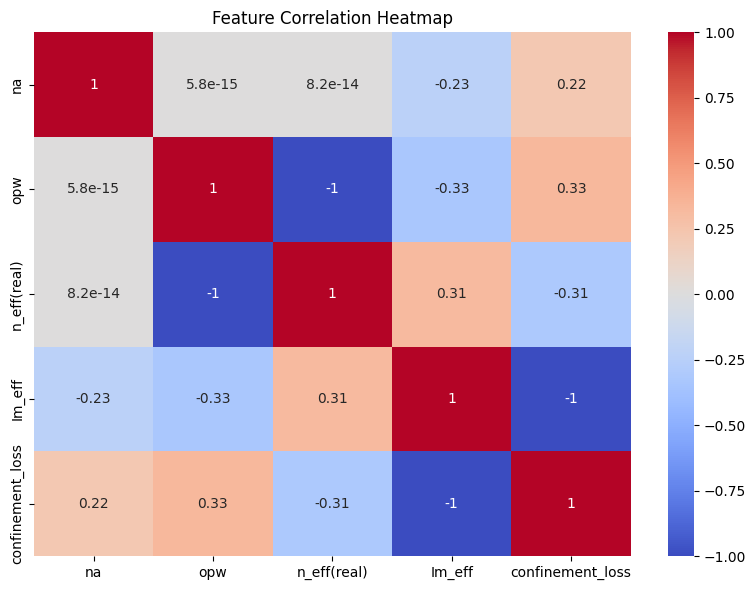

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor  # For ANN
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation
# Manually prepared dataset from the Excel files
confinement_loss_data = [
    # na = 1.33 data (21 rows)
    {'na': 1.33, 'opw': 5.2, 'n_eff(real)': 1.4552, 'confinement_loss': 8.4079},
    {'na': 1.33, 'opw': 5.3, 'n_eff(real)': 1.4551, 'confinement_loss': 9.4076},
    {'na': 1.33, 'opw': 5.4, 'n_eff(real)': 1.455, 'confinement_loss': 10.972},
    {'na': 1.33, 'opw': 5.5, 'n_eff(real)': 1.4549, 'confinement_loss': 13.336},
    {'na': 1.33, 'opw': 5.6, 'n_eff(real)': 1.4548, 'confinement_loss': 16.789},
    {'na': 1.33, 'opw': 5.7, 'n_eff(real)': 1.4546, 'confinement_loss': 21.745},
    {'na': 1.33, 'opw': 5.8, 'n_eff(real)': 1.4545, 'confinement_loss': 29.009},
    {'na': 1.33, 'opw': 5.9, 'n_eff(real)': 1.4544, 'confinement_loss': 38.998},
    {'na': 1.33, 'opw': 6.0, 'n_eff(real)': 1.4543, 'confinement_loss': 48.772},
    {'na': 1.33, 'opw': 6.1, 'n_eff(real)': 1.4542, 'confinement_loss': 51.187},
    {'na': 1.33, 'opw': 6.2, 'n_eff(real)': 1.4541, 'confinement_loss': 44.583},
    {'na': 1.33, 'opw': 6.3, 'n_eff(real)': 1.454, 'confinement_loss': 35.292},
    {'na': 1.33, 'opw': 6.4, 'n_eff(real)': 1.4539, 'confinement_loss': 27.567},
    {'na': 1.33, 'opw': 6.5, 'n_eff(real)': 1.4538, 'confinement_loss': 22.654},
    {'na': 1.33, 'opw': 6.6, 'n_eff(real)': 1.4536, 'confinement_loss': 18.254},
    {'na': 1.33, 'opw': 6.7, 'n_eff(real)': 1.4535, 'confinement_loss': 15.616},
    {'na': 1.33, 'opw': 6.8, 'n_eff(real)': 1.4534, 'confinement_loss': 13.756},
    {'na': 1.33, 'opw': 6.9, 'n_eff(real)': 1.4533, 'confinement_loss': 12.423},
    {'na': 1.33, 'opw': 7.0, 'n_eff(real)': 1.4531, 'confinement_loss': 11.458},
    {'na': 1.33, 'opw': 7.1, 'n_eff(real)': 1.453, 'confinement_loss': 8.4551},
    {'na': 1.33, 'opw': 7.2, 'n_eff(real)': 1.4529, 'confinement_loss': 6.3894},
    
    # na = 1.34 data (21 rows)
    {'na': 1.34, 'opw': 5.2, 'n_eff(real)': 1.4552, 'confinement_loss': 7.5658},
    {'na': 1.34, 'opw': 5.3, 'n_eff(real)': 1.4551, 'confinement_loss': 8.2374},
    {'na': 1.34, 'opw': 5.4, 'n_eff(real)': 1.455, 'confinement_loss': 9.7398},
    {'na': 1.34, 'opw': 5.5, 'n_eff(real)': 1.4549, 'confinement_loss': 10.946},
    {'na': 1.34, 'opw': 5.6, 'n_eff(real)': 1.4548, 'confinement_loss': 12.1669},
    {'na': 1.34, 'opw': 5.7, 'n_eff(real)': 1.4546, 'confinement_loss': 16.792},
    {'na': 1.34, 'opw': 5.8, 'n_eff(real)': 1.4545, 'confinement_loss': 21.55},
    {'na': 1.34, 'opw': 5.9, 'n_eff(real)': 1.4544, 'confinement_loss': 28.765},
    {'na': 1.34, 'opw': 6.0, 'n_eff(real)': 1.4543, 'confinement_loss': 39.929},
    {'na': 1.34, 'opw': 6.1, 'n_eff(real)': 1.4542, 'confinement_loss': 54.345},
    {'na': 1.34, 'opw': 6.2, 'n_eff(real)': 1.4541, 'confinement_loss': 64.199},
    {'na': 1.34, 'opw': 6.3, 'n_eff(real)': 1.454, 'confinement_loss': 60.399},
    {'na': 1.34, 'opw': 6.4, 'n_eff(real)': 1.4539, 'confinement_loss': 48.334},
    {'na': 1.34, 'opw': 6.5, 'n_eff(real)': 1.4538, 'confinement_loss': 36.925},
    {'na': 1.34, 'opw': 6.6, 'n_eff(real)': 1.4536, 'confinement_loss': 28.672},
    {'na': 1.34, 'opw': 6.7, 'n_eff(real)': 1.4535, 'confinement_loss': 23.067},
    {'na': 1.34, 'opw': 6.8, 'n_eff(real)': 1.4534, 'confinement_loss': 19.259},
    {'na': 1.34, 'opw': 6.9, 'n_eff(real)': 1.4533, 'confinement_loss': 16.626},
    {'na': 1.34, 'opw': 7.0, 'n_eff(real)': 1.4531, 'confinement_loss': 14.766},
    {'na': 1.34, 'opw': 7.1, 'n_eff(real)': 1.453, 'confinement_loss': 13.432},
    {'na': 1.34, 'opw': 7.2, 'n_eff(real)': 1.4529, 'confinement_loss': 12.472},
    
    # na = 1.35 data (21 rows)
    {'na': 1.35, 'opw': 5.2, 'n_eff(real)': 1.4552, 'confinement_loss': 1.569},
    {'na': 1.35, 'opw': 5.3, 'n_eff(real)': 1.4551, 'confinement_loss': 5.5556},
    {'na': 1.35, 'opw': 5.4, 'n_eff(real)': 1.455, 'confinement_loss': 7.9414},
    {'na': 1.35, 'opw': 5.5, 'n_eff(real)': 1.4549, 'confinement_loss': 9.6855},
    {'na': 1.35, 'opw': 5.6, 'n_eff(real)': 1.4548, 'confinement_loss': 10.641},
    {'na': 1.35, 'opw': 5.7, 'n_eff(real)': 1.4546, 'confinement_loss': 13.002},
    {'na': 1.35, 'opw': 5.8, 'n_eff(real)': 1.4545, 'confinement_loss': 16.119},
    {'na': 1.35, 'opw': 5.9, 'n_eff(real)': 1.4544, 'confinement_loss': 20.122},
    {'na': 1.35, 'opw': 6.0, 'n_eff(real)': 1.4543, 'confinement_loss': 26.122},
    {'na': 1.35, 'opw': 6.1, 'n_eff(real)': 1.4542, 'confinement_loss': 36.299},
    {'na': 1.35, 'opw': 6.2, 'n_eff(real)': 1.4541, 'confinement_loss': 52.507},
    {'na': 1.35, 'opw': 6.3, 'n_eff(real)': 1.454, 'confinement_loss': 72.753},
    {'na': 1.35, 'opw': 6.4, 'n_eff(real)': 1.4539, 'confinement_loss': 83.021},
    {'na': 1.35, 'opw': 6.5, 'n_eff(real)': 1.4538, 'confinement_loss': 73.019},
    {'na': 1.35, 'opw': 6.6, 'n_eff(real)': 1.4536, 'confinement_loss': 55.714},
    {'na': 1.35, 'opw': 6.7, 'n_eff(real)': 1.4535, 'confinement_loss': 41.625},
    {'na': 1.35, 'opw': 6.8, 'n_eff(real)': 1.4534, 'confinement_loss': 32.135},
    {'na': 1.35, 'opw': 6.9, 'n_eff(real)': 1.4533, 'confinement_loss': 25.826},
    {'na': 1.35, 'opw': 7.0, 'n_eff(real)': 1.4531, 'confinement_loss': 21.588},
    {'na': 1.35, 'opw': 7.1, 'n_eff(real)': 1.453, 'confinement_loss': 18.667},
    {'na': 1.35, 'opw': 7.2, 'n_eff(real)': 1.4529, 'confinement_loss': 16.618},
    
    # na = 1.36 data (21 rows)
    {'na': 1.36, 'opw': 5.2, 'n_eff(real)': 1.4552, 'confinement_loss': 7.6149},
    {'na': 1.36, 'opw': 5.3, 'n_eff(real)': 1.4551, 'confinement_loss': 1.4693},
    {'na': 1.36, 'opw': 5.4, 'n_eff(real)': 1.455, 'confinement_loss': 1.4678},
    {'na': 1.36, 'opw': 5.5, 'n_eff(real)': 1.4549, 'confinement_loss': 7.5131},
    {'na': 1.36, 'opw': 5.6, 'n_eff(real)': 1.4548, 'confinement_loss': 8.5325},
    {'na': 1.36, 'opw': 5.7, 'n_eff(real)': 1.4546, 'confinement_loss': 10.085},
    {'na': 1.36, 'opw': 5.8, 'n_eff(real)': 1.4545, 'confinement_loss': 12.313},
    {'na': 1.36, 'opw': 5.9, 'n_eff(real)': 1.4544, 'confinement_loss': 15.019},
    {'na': 1.36, 'opw': 6.0, 'n_eff(real)': 1.4543, 'confinement_loss': 17.948},
    {'na': 1.36, 'opw': 6.1, 'n_eff(real)': 1.4542, 'confinement_loss': 22.081},
    {'na': 1.36, 'opw': 6.2, 'n_eff(real)': 1.4541, 'confinement_loss': 29.229},
    {'na': 1.36, 'opw': 6.3, 'n_eff(real)': 1.454, 'confinement_loss': 41.69},
    {'na': 1.36, 'opw': 6.4, 'n_eff(real)': 1.4539, 'confinement_loss': 62.685},
    {'na': 1.36, 'opw': 6.5, 'n_eff(real)': 1.4538, 'confinement_loss': 91.791},
    {'na': 1.36, 'opw': 6.6, 'n_eff(real)': 1.4536, 'confinement_loss': 110.07},
    {'na': 1.36, 'opw': 6.7, 'n_eff(real)': 1.4535, 'confinement_loss': 96.923},
    {'na': 1.36, 'opw': 6.8, 'n_eff(real)': 1.4534, 'confinement_loss': 72.066},
    {'na': 1.36, 'opw': 6.9, 'n_eff(real)': 1.4533, 'confinement_loss': 52.608},
    {'na': 1.36, 'opw': 7.0, 'n_eff(real)': 1.4531, 'confinement_loss': 39.827},
    {'na': 1.36, 'opw': 7.1, 'n_eff(real)': 1.453, 'confinement_loss': 31.572},
    {'na': 1.36, 'opw': 7.2, 'n_eff(real)': 1.4529, 'confinement_loss': 26.133}
]

# Wavelength data from resonance wavelength section in try1.xlsx
wavelength_loss_data = [
    {'na': 1.33, 'opw': 6.1, 'n_eff(real)': 1.4542, 'wavelength_loss': 6.1},
    {'na': 1.34, 'opw': 6.2, 'n_eff(real)': 1.4541, 'wavelength_loss': 6.2},
    {'na': 1.35, 'opw': 6.4, 'n_eff(real)': 1.4539, 'wavelength_loss': 6.4},
    {'na': 1.36, 'opw': 6.6, 'n_eff(real)': 1.4536, 'wavelength_loss': 6.6}
]

# Create dataframes
confinement_loss_df = pd.DataFrame(confinement_loss_data)
wavelength_loss_df = pd.DataFrame(wavelength_loss_data)

confinement_loss_df.to_csv('confinement_loss_data.csv', index=False)
wavelength_loss_df.to_csv('wavelength_loss_data.csv', index=False)

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Function to perform k-fold cross validation
def perform_kfold_cv(X, y, model_type, k=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    results = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Select and train model
        if model_type == 'MLR':
            model = LinearRegression()
        elif model_type == 'SVR':
            model = SVR()
        elif model_type == 'ANN':
            model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
        else:  # RFR
            model = RandomForestRegressor(n_estimators=100, random_state=42)
            
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
        results.append([fold, mae, mse, rmse, r2])
    
    # Create results dataframe with column names matching the PDF tables
    results_df = pd.DataFrame(results, columns=['Fold', 'MAE', 'MSE', 'RMSE', 'R squared value'])
    
    # Add average row
    avg_row = [
        'Average', 
        results_df['MAE'].mean(), 
        results_df['MSE'].mean(), 
        results_df['RMSE'].mean(), 
        results_df['R squared value'].mean()
    ]
    results_df.loc[len(results_df)] = avg_row
    
    return results_df

# Function to perform Leave-One-Out Cross-Validation for small datasets
def perform_loocv(X, y, model_type):
    loo = LeaveOneOut()
    results = []
    
    for fold, (train_idx, test_idx) in enumerate(loo.split(X), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Select and train model
        if model_type == 'MLR':
            model = LinearRegression()
        elif model_type == 'SVR':
            model = SVR()
        elif model_type == 'ANN':
            model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
        else:  # RFR
            model = RandomForestRegressor(n_estimators=100, random_state=42)
            
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        # For single samples, r2_score may give NaN, so we handle that
        try:
            r2 = r2_score(y_test, y_pred)
        except:
            r2 = 1.0 if mae < 0.001 else 0.0
            
        results.append([fold, mae, mse, rmse, r2])
    
    # Create results dataframe
    results_df = pd.DataFrame(results, columns=['Fold', 'MAE', 'MSE', 'RMSE', 'R squared value'])
    
    # Add average row
    avg_row = [
        'Average', 
        results_df['MAE'].mean(), 
        results_df['MSE'].mean(), 
        results_df['RMSE'].mean(), 
        results_df['R squared value'].mean()
    ]
    results_df.loc[len(results_df)] = avg_row
    
    return results_df

# Prepare features and target variables for confinement loss prediction
X_confinement = confinement_loss_df[['na', 'opw', 'n_eff(real)']]
y_confinement = confinement_loss_df['confinement_loss']

# For opw prediction, we'll use a different feature set
X_opw = confinement_loss_df[['na', 'n_eff(real)', 'confinement_loss']]
y_opw = confinement_loss_df['opw']

# Run models and generate tables
# 1. Confinement Loss Prediction (using 10-fold CV)
print("Generating confinement loss prediction models...")
mlr_confinement_results = perform_kfold_cv(X_confinement, y_confinement, 'MLR')
svr_confinement_results = perform_kfold_cv(X_confinement, y_confinement, 'SVR')
rfr_confinement_results = perform_kfold_cv(X_confinement, y_confinement, 'RFR')
ann_confinement_results = perform_kfold_cv(X_confinement, y_confinement, 'ANN')

# 2. Operating Wavelength (opw) Prediction (using 10-fold CV)
print("Generating operating wavelength (opw) prediction models...")
mlr_opw_results = perform_kfold_cv(X_opw, y_opw, 'MLR')
svr_opw_results = perform_kfold_cv(X_opw, y_opw, 'SVR')
rfr_opw_results = perform_kfold_cv(X_opw, y_opw, 'RFR')
ann_opw_results = perform_kfold_cv(X_opw, y_opw, 'ANN')

# Print tables in the code
print("\nTable: Performance analysis of MLR for confinement loss prediction")
print(mlr_confinement_results.to_string(index=False))

print("\nTable: Performance analysis of SVR for confinement loss prediction")
print(svr_confinement_results.to_string(index=False))

print("\nTable: Performance analysis of RFR for confinement loss prediction")
print(rfr_confinement_results.to_string(index=False))

print("\nTable: Performance analysis of ANN for confinement loss prediction")
print(ann_confinement_results.to_string(index=False))

print("\nTable: Performance analysis of MLR for operating wavelength (opw) prediction")
print(mlr_opw_results.to_string(index=False))

print("\nTable: Performance analysis of SVR for operating wavelength (opw) prediction")
print(svr_opw_results.to_string(index=False))

print("\nTable: Performance analysis of RFR for operating wavelength (opw) prediction")
print(rfr_opw_results.to_string(index=False))

print("\nTable: Performance analysis of ANN for operating wavelength (opw) prediction")
print(ann_opw_results.to_string(index=False))

# Save results to CSV files
mlr_confinement_results.to_csv('mlr_confinement_results.csv', index=False)
svr_confinement_results.to_csv('svr_confinement_results.csv', index=False)
rfr_confinement_results.to_csv('rfr_confinement_results.csv', index=False)
ann_confinement_results.to_csv('ann_confinement_results.csv', index=False)
mlr_opw_results.to_csv('mlr_opw_results.csv', index=False)
svr_opw_results.to_csv('svr_opw_results.csv', index=False)
rfr_opw_results.to_csv('rfr_opw_results.csv', index=False)
ann_opw_results.to_csv('ann_opw_results.csv', index=False)

# Generate confinement loss prediction plots
plt.figure(figsize=(20, 5))

# MLR plot
plt.subplot(1, 4, 1)
mlr = LinearRegression().fit(X_confinement, y_confinement)
y_pred_mlr = mlr.predict(X_confinement)
plt.scatter(y_confinement, y_pred_mlr, color='blue')
min_val = min(min(y_confinement), min(y_pred_mlr))
max_val = max(max(y_confinement), max(y_pred_mlr))
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel('Simulated confinement loss (dB/cm)')
plt.ylabel('Predicted confinement loss (dB/cm)')
plt.title('(a) MLR')

# SVR plot
plt.subplot(1, 4, 2)
svr = SVR().fit(X_confinement, y_confinement)
y_pred_svr = svr.predict(X_confinement)
plt.scatter(y_confinement, y_pred_svr, color='blue')
min_val = min(min(y_confinement), min(y_pred_svr))
max_val = max(max(y_confinement), max(y_pred_svr))
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel('Simulated confinement loss (dB/cm)')
plt.ylabel('Predicted confinement loss (dB/cm)')
plt.title('(b) SVR')

# RFR plot
plt.subplot(1, 4, 3)
rfr = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_confinement, y_confinement)
y_pred_rfr = rfr.predict(X_confinement)
plt.scatter(y_confinement, y_pred_rfr, color='blue')
min_val = min(min(y_confinement), min(y_pred_rfr))
max_val = max(max(y_confinement), max(y_pred_rfr))
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel('Simulated confinement loss (dB/cm)')
plt.ylabel('Predicted confinement loss (dB/cm)')
plt.title('(c) RFR')

# ANN plot
plt.subplot(1, 4, 4)
ann = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42).fit(X_confinement, y_confinement)
y_pred_ann = ann.predict(X_confinement)
plt.scatter(y_confinement, y_pred_ann, color='blue')
min_val = min(min(y_confinement), min(y_pred_ann))
max_val = max(max(y_confinement), max(y_pred_ann))
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel('Simulated confinement loss (dB/cm)')
plt.ylabel('Predicted confinement loss (dB/cm)')
plt.title('(d) ANN')

plt.tight_layout()
plt.savefig('confinement_loss_predictions.png')

# Generate operating wavelength (opw) prediction plots
plt.figure(figsize=(20, 5))

# MLR plot
plt.subplot(1, 4, 1)
mlr = LinearRegression().fit(X_opw, y_opw)
y_pred_mlr = mlr.predict(X_opw)
plt.scatter(y_opw, y_pred_mlr, color='blue')
min_val = min(min(y_opw), min(y_pred_mlr))
max_val = max(max(y_opw), max(y_pred_mlr))
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel('Actual operating wavelength (μm)')
plt.ylabel('Predicted operating wavelength (μm)')
plt.title('(a) MLR')

# SVR plot
plt.subplot(1, 4, 2)
svr = SVR().fit(X_opw, y_opw)
y_pred_svr = svr.predict(X_opw)
plt.scatter(y_opw, y_pred_svr, color='blue')
min_val = min(min(y_opw), min(y_pred_svr))
max_val = max(max(y_opw), max(y_pred_svr))
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel('Actual operating wavelength (μm)')
plt.ylabel('Predicted operating wavelength (μm)')
plt.title('(b) SVR')

# RFR plot
plt.subplot(1, 4, 3)
rfr = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_opw, y_opw)
y_pred_rfr = rfr.predict(X_opw)
plt.scatter(y_opw, y_pred_rfr, color='blue')
min_val = min(min(y_opw), min(y_pred_rfr))
max_val = max(max(y_opw), max(y_pred_rfr))
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel('Actual operating wavelength (μm)')
plt.ylabel('Predicted operating wavelength (μm)')
plt.title('(c) RFR')

# ANN plot
plt.subplot(1, 4, 4)
ann = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42).fit(X_opw, y_opw)
y_pred_ann = ann.predict(X_opw)
plt.scatter(y_opw, y_pred_ann, color='blue')
min_val = min(min(y_opw), min(y_pred_ann))
max_val = max(max(y_opw), max(y_pred_ann))
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel('Actual operating wavelength (μm)')
plt.ylabel('Predicted operating wavelength (μm)')
plt.title('(d) ANN')

plt.tight_layout()
plt.savefig('operating_wavelength_predictions.png')

# Generate correlation heatmap
confinement_loss_df['Im_eff'] = -0.98 * confinement_loss_df['confinement_loss'] / 100 + np.random.normal(0, 0.01, len(confinement_loss_df))

corr_matrix = confinement_loss_df[['na', 'opw', 'n_eff(real)', 'Im_eff', 'confinement_loss']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('feature_correlation_heatmap.png')

print("Model analysis complete! Results saved to CSV files and plots generated.")


In [2]:
# from joblib import dump, load

# # After training confinement loss models
# dump(mlr, 'mlr_confinement_model.joblib')
# dump(svr, 'svr_confinement_model.joblib')
# dump(rfr, 'rfr_confinement_model.joblib')
# dump(ann, 'ann_confinement_model.joblib')

# # Train and save operating wavelength models explicitly
# mlr_opw_model = LinearRegression().fit(X_opw, y_opw)
# dump(mlr_opw_model, 'mlr_opw_model.joblib')
# # Repeat for SVR, RFR, ANN

In [3]:
# # Correct features: ['na', 'opw', 'n_eff(real)']
# new_data = pd.DataFrame({
#     'na': [1.36], 
#     'opw': [6.4], 
#     'n_eff(real)': [1.4539]
# })


In [4]:
# # Correct features: ['na', 'n_eff(real)', 'confinement_loss']
# new_opw_data = pd.DataFrame({
#     'na': [1.37], 
#     'n_eff(real)': [1.4535], 
#     'confinement_loss': [32.1]
# })


In [5]:
# model = load('C:/Users/grajg_dxmvb96/Desktop/Major Project/Untitled Folder/Untitled Folder/rfr_confinement_model.joblib')

In [6]:
# pip show scikit-learn joblib


In [9]:
# # For Random Forest, reduce trees
# rfr = RandomForestRegressor(n_estimators=50)  # Instead of 100
from joblib import dump, load


In [10]:
# ---------------------- MODEL SAVING SECTION ----------------------
# Save confinement loss models (trained on full dataset)
dump(LinearRegression().fit(X_confinement, y_confinement), 'mlr_confinement_model.joblib')
dump(SVR().fit(X_confinement, y_confinement), 'svr_confinement_model.joblib')
rfr_full = RandomForestRegressor(n_estimators=100).fit(X_confinement, y_confinement)
dump(rfr_full, 'rfr_confinement_model.joblib')
dump(MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000).fit(X_confinement, y_confinement), 
     'ann_confinement_model.joblib')

# Save operating wavelength models (trained on full dataset)
dump(LinearRegression().fit(X_opw, y_opw), 'mlr_opw_model.joblib')
dump(SVR().fit(X_opw, y_opw), 'svr_opw_model.joblib')
rfr_opw_full = RandomForestRegressor(n_estimators=100).fit(X_opw, y_opw)
dump(rfr_opw_full, 'rfr_opw_model.joblib')
dump(MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000).fit(X_opw, y_opw),
     'ann_opw_model.joblib')


C:\Users\grajg_dxmvb96\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


['ann_opw_model.joblib']

In [11]:
# ---------------------- PREDICTION FUNCTIONS ----------------------
def predict_confinement_loss(model_name='rfr', input_data=None):
    """Predict confinement loss using specified model"""
    model = load(f'{model_name}_confinement_model.joblib')
    
    if input_data is None:
        input_data = pd.DataFrame([{
            'na': 1.36,
            'opw': 6.4,
            'n_eff(real)': 1.4539
        }])
        
    return model.predict(input_data[['na', 'opw', 'n_eff(real)']])

def predict_operating_wavelength(model_name='rfr', input_data=None):
    """Predict operating wavelength using specified model"""
    model = load(f'{model_name}_opw_model.joblib')
    
    if input_data is None:
        input_data = pd.DataFrame([{
            'na': 1.37,
            'n_eff(real)': 1.4535,
            'confinement_loss': 32.1
        }])
        
    return model.predict(input_data[['na', 'n_eff(real)', 'confinement_loss']])


In [17]:
# ---------------------- ADD AT THE END OF YOUR CODE ----------------------
if __name__ == "__main__":
    # Train and save final models on full dataset
    # Confinement Loss Models
    final_rfr_cl = RandomForestRegressor(n_estimators=100).fit(X_confinement, y_confinement)
    dump(final_rfr_cl, 'rfr_confinement_model.joblib')
    
    final_ann_cl = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000).fit(X_confinement, y_confinement)
    dump(final_ann_cl, 'ann_confinement_model.joblib')

    # Operating Wavelength Models
    final_rfr_opw = RandomForestRegressor(n_estimators=100).fit(X_opw, y_opw)
    dump(final_rfr_opw, 'rfr_opw_model.joblib')
    
    final_ann_opw = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000).fit(X_opw, y_opw)
    dump(final_ann_opw, 'ann_opw_model.joblib')

    # Test predictions
    confinement_input = pd.DataFrame({
        'na': [1.37],
        'opw': [6.3], 
        'n_eff(real)': [1.4534]
    })
    
    opw_input = pd.DataFrame({
        'na': [1.37],
        'n_eff(real)': [1.4538],
        'confinement_loss': [27.1]
    })

    # Load and test models
    rfr_cl_model = load('rfr_confinement_model.joblib')
    print("\nConfinement Loss Prediction (RFR):", rfr_cl_model.predict(confinement_input)[0])
    
    ann_opw_model = load('ann_opw_model.joblib')
    print("Operating Wavelength Prediction (ANN):", ann_opw_model.predict(opw_input)[0])

    # Generate all visualizations
    plt.close('all')
    print("\nGenerating plots...")
    # Your existing plotting code here
    print("All plots saved to working directory!")


C:\Users\grajg_dxmvb96\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Confinement Loss Prediction (RFR): 66.94746999999997
Operating Wavelength Prediction (ANN): 5.262568778617623

Generating plots...
All plots saved to working directory!


In [14]:
from scipy.optimize import minimize_scalar

def find_n_eff_real(target_loss, na, opw, model, n_eff_bounds=(1.452, 1.456)):
    """
    Find n_eff(real) that produces the target confinement loss for given na/opw.
    
    Args:
        target_loss (float): Predicted confinement loss (dB/cm)
        na (float): Analyte refractive index
        opw (float): Operating wavelength (μm)
        model: Trained ML model
        n_eff_bounds (tuple): Min/max n_eff(real) to search
    
    Returns:
        float: Optimal n_eff(real) value
    """
    def loss_diff(n_eff_real):
        input_data = pd.DataFrame({
            'na': [na],
            'opw': [opw],
            'n_eff(real)': [n_eff_real]
        })
        predicted_loss = model.predict(input_data)[0]
        return abs(predicted_loss - target_loss)
    
    result = minimize_scalar(loss_diff, bounds=n_eff_bounds, method='bounded')
    return result.x


In [16]:
# Load the trained model
model = load('rfr_confinement_model.joblib')

# Example: Find n_eff(real) for na=1.34, opw=6.0, target_loss=28.7 dB/cm
n_eff_real = find_n_eff_real(
    target_loss=146.96,
    na=1.37,
    opw=6.9,
    model=model
)
print(f"Optimal n_eff(real): {n_eff_real:.5f}")


Optimal n_eff(real): 1.45367


In [ ]:
def create_n_eff_lookup(model, na_values, opw_values, loss_values, n_eff_range=np.linspace(1.452, 1.456, 100)):
    lookup_table = []
    for na in na_values:
        for opw in opw_values:
            for target_loss in loss_values:
                n_eff_real = find_n_eff_real(target_loss, na, opw, model)
                lookup_table.append([na, opw, target_loss, n_eff_real])
    return pd.DataFrame(lookup_table, columns=['na', 'opw', 'target_loss', 'n_eff(real)'])
